In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import geopandas

In [2]:
data = pd.read_csv("dataset_3.csv")
data["magnitude"] = data["magnitude"].round(1)
data["date"] = pd.to_datetime(data[["year", "month", "day", "hour", "minute"]])
data = data.sort_values("date")
data = data[data["date"] < "2023-01-01"]
data["time_since_last_earthquake"] = data.date.diff().map(
    lambda x: x.total_seconds() / 86400
)

In [3]:
datageo = geopandas.read_file("EFSM20_CF_PLD.geojson")
datageo = datageo[datageo.idsource.str.startswith("NAF")]  # north anatolian fault

In [4]:
import pygmt

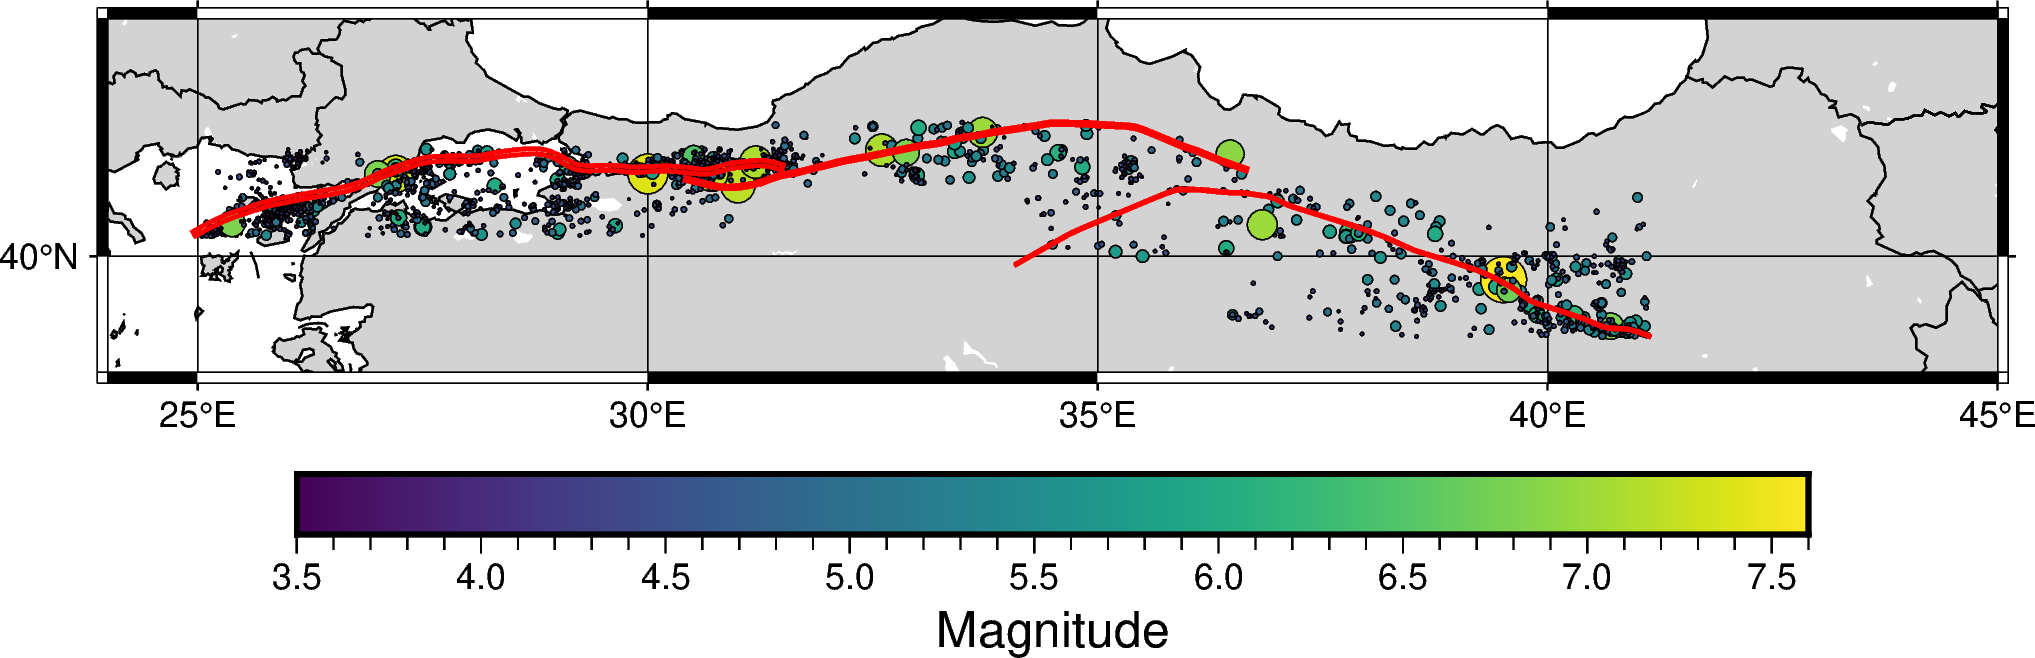

In [37]:
fig = pygmt.Figure()
pygmt.makecpt(cmap="viridis", series=[data.magnitude.min(), data.magnitude.max()])
fig.coast(
    # Set the x-range from 10E to 20E and the y-range to 35N to 45N
    region="24/45/39/42",
    # Set projection to Mercator, and the figure size to 15 centimeters
    projection="M16c",
    # Set the color of the land to light gray
    land="lightgray",
    # Set the color of the water to white
    water="white",
    # Display the national borders and set the pen thickness to 0.5p
    borders="1/0.5p",
    # Display the shorelines and set the pen thickness to 0.5p
    shorelines="1/0.5p",
    # Set the frame to display annotations and gridlines
    frame="ag",
)
fig.plot(
     x = data['longitude'],
     y = data['latitude'],
     size= 0.002 * 2**data.magnitude,
     fill=data.magnitude,
     cmap=True,
     style="cc",
     pen="black",
)
fig.plot(data=datageo, pen="1,red")
fig.colorbar(frame="af+lMagnitude")
fig.savefig("map.png")
fig.show()